In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
bn_df = pd.read_csv('bn.csv') \
                    .rename(columns={'Unnamed: 0' : 'IR'}).set_index('IR')
def newname (s : str) : 
  l = s.split("_")
  return (" ".join(l[:-1]),l[-1]) 
for cname in bn_df.columns :
  bn_df.rename(columns={cname: newname(cname)}, inplace=True)

bn_df = bn_df.map(lambda x : round(x,1))

def join (col) :
  dt = bn_df[bn_df.columns[bn_df.columns.get_loc(col) + 1]]
  
  bn_df[col[0]] = bn_df[col].astype(str) + "±" + dt.astype(str)
  
for (a,b) in bn_df.columns:
  if b == 'mean' : join((a,b))
for a in bn_df.columns:
  if a[1] == 'mean' or a[1] == 'stdev' : del bn_df[a]

for cname in bn_df.columns :
  bn_df.rename(columns={cname: tuple(cname.split(" "))}, inplace=True)

bn_df.columns = pd.MultiIndex.from_tuples(bn_df.columns, names=['Bayesian Network','Utility Method'])
display(bn_df)

Bayesian Network       asia             earthquake                   survey  \
Utility Method            1           2          1         2              1   
IR                                                                            
dappl               1.6±0.3     2.8±0.3    1.3±0.1   2.4±0.2        1.7±0.2   
problog           28.6±11.4    53.4±5.5   15.2±4.8  33.2±2.3    274.4±194.3   
derk              78.5±40.8  119.2±20.7   19.4±5.6  24.6±4.5  4020.8±1096.3   

Bayesian Network              
Utility Method             2  
IR                            
dappl                2.9±0.2  
problog           182.3±43.2  
derk                 nan±nan

In [52]:
# print bn_df as table
table = bn_df.to_latex(float_format="%.1f")
print(table)

\begin{tabular}{lllllll}
\toprule
Bayesian Network & \multicolumn{2}{r}{asia} & \multicolumn{2}{r}{earthquake} & \multicolumn{2}{r}{survey} \\
Utility Method & 1 & 2 & 1 & 2 & 1 & 2 \\
IR &  &  &  &  &  &  \\
\midrule
dappl & 1.6±0.3 & 2.8±0.3 & 1.3±0.1 & 2.4±0.2 & 1.7±0.2 & 2.9±0.2 \\
problog & 28.6±11.4 & 53.4±5.5 & 15.2±4.8 & 33.2±2.3 & 274.4±194.3 & 182.3±43.2 \\
derk & 78.5±40.8 & 119.2±20.7 & 19.4±5.6 & 24.6±4.5 & 4020.8±1096.3 & nan±nan \\
\bottomrule
\end{tabular}



In [4]:
hmm_df = pd.read_csv('hmm.csv').rename(columns={'Unnamed: 0' : 'tool'}).set_index('tool')
for cname in hmm_df.columns :
  hmm_df.rename(columns={cname: (cname.split('_')[0],cname.split('_')[1])}, inplace=True)

In [5]:
x = list(set([int(a) for (a,_) in list(hmm_df.columns)]))
x.sort()
means = [(_,b) for (_,b) in hmm_df.columns if b == 'mean']
stdevs = [(_,b) for (_,b) in hmm_df.columns if b == 'stdev']
hmm_df_means = hmm_df[means]
hmm_df_stdevs = hmm_df[stdevs]

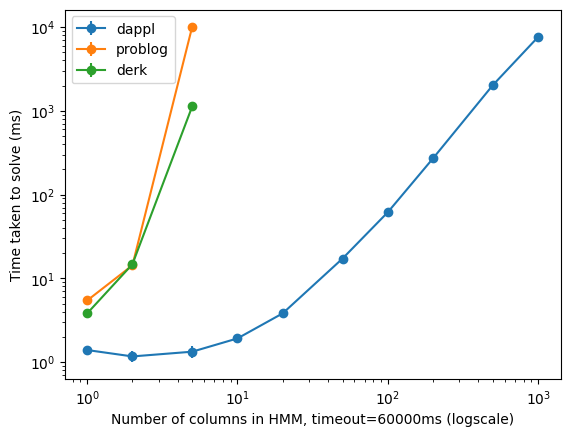

In [6]:
for row_name, row_data in hmm_df_means.iterrows() :
  y = row_data
  a = list(hmm_df_stdevs.loc[row_name])
  plt.errorbar(x, y, yerr=a, fmt='-o', label=row_name)

plt.xscale('log')
plt.yscale('log')

# Add labels
plt.xlabel('Number of columns in HMM, timeout=60000ms (logscale)')
plt.ylabel('Time taken to solve (ms)')
plt.legend()
plt.savefig('hmm.svg', format='svg')

# Show the plot
plt.show()

In [7]:
ladder_long = pd.read_csv('ladder_long.csv').rename(columns={'Unnamed: 0' : 'tool'}).set_index('tool')
for cname in ladder_long.columns :
  ladder_long.rename(columns={cname: (cname.split('_')[0],cname.split('_')[1])}, inplace=True)
x = list(set([int(a) for (a,_) in list(ladder_long.columns)]))
x.sort()
means = [(_,b) for (_,b) in ladder_long.columns if b == 'mean']
stdevs = [(_,b) for (_,b) in ladder_long.columns if b == 'stdev']
ladder_long_means = ladder_long[means]
ladder_long_stdevs = ladder_long[stdevs]

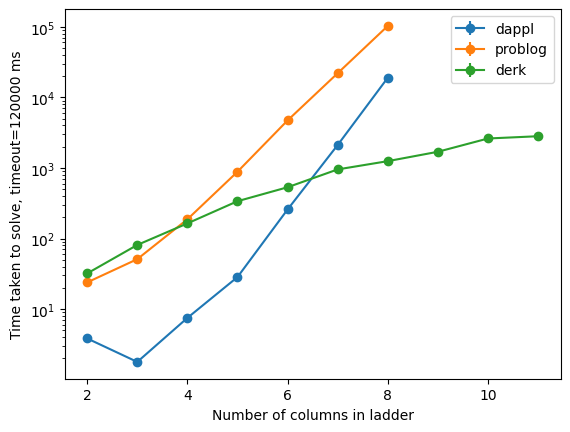

In [8]:
for row_name, row_data in ladder_long_means.iterrows() :
  y = row_data
  a = list(ladder_long_stdevs.loc[row_name])
  plt.errorbar(x, y, yerr=a, fmt='-o', label=row_name)

plt.yscale('log')

# Add labels
plt.xlabel('Number of columns in ladder')
plt.ylabel('Time taken to solve, timeout=120000 ms')
plt.legend()
plt.savefig('long_ladder.svg', format='svg')

# Show the plot
plt.show()

In [9]:
ladder_4 = pd.read_csv('ladder_4.csv').rename(columns={'Unnamed: 0' : 'tool'}).set_index('tool')
for cname in ladder_4.columns :
  ladder_4.rename(columns={cname: (cname.split('_')[0],cname.split('_')[1])}, inplace=True)
x = list(set([int(a) for (a,_) in list(ladder_4.columns)]))
x.sort()
means = [(_,b) for (_,b) in ladder_4.columns if b == 'mean']
stdevs = [(_,b) for (_,b) in ladder_4.columns if b == 'stdev']
ladder_4_means = ladder_4[means]
ladder_4_stdevs = ladder_4[stdevs]

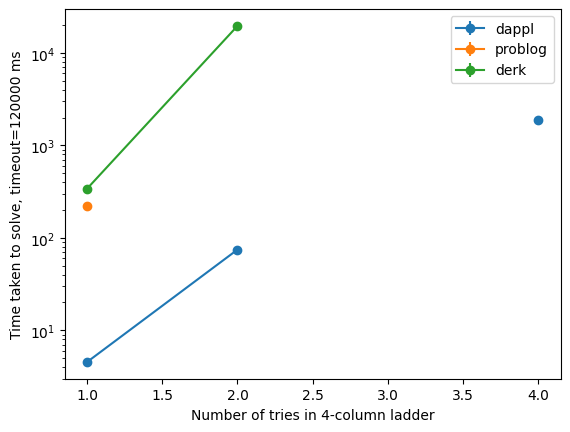

In [10]:
for row_name, row_data in ladder_4_means.iterrows() :
  y = row_data
  a = list(ladder_4_stdevs.loc[row_name])
  plt.errorbar(x, y, yerr=a, fmt='-o', label=row_name)

plt.yscale('log')

# Add labels
plt.xlabel('Number of tries in 4-column ladder')
plt.ylabel('Time taken to solve, timeout=120000 ms')
plt.legend()
plt.savefig('ladder_3.svg', format='svg')

# Show the plot
plt.show()

In [11]:
ladder_3 = pd.read_csv('ladder_3.csv').rename(columns={'Unnamed: 0' : 'tool'}).set_index('tool')
for cname in ladder_3.columns :
  ladder_3.rename(columns={cname: (cname.split('_')[0],cname.split('_')[1])}, inplace=True)
x = list(set([int(a) for (a,_) in list(ladder_3.columns)]))
x.sort()
means = [(_,b) for (_,b) in ladder_3.columns if b == 'mean']
stdevs = [(_,b) for (_,b) in ladder_3.columns if b == 'stdev']
ladder_3_means = ladder_3[means]
ladder_3_stdevs = ladder_3[stdevs]

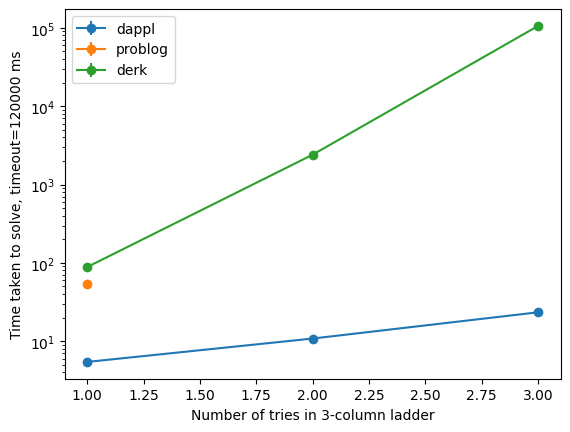

In [12]:
for row_name, row_data in ladder_3_means.iterrows() :
  y = row_data
  a = list(ladder_3_stdevs.loc[row_name])
  plt.errorbar(x, y, yerr=a, fmt='-o', label=row_name)

plt.yscale('log')

# Add labels
plt.xlabel('Number of tries in 3-column ladder')
plt.ylabel('Time taken to solve, timeout=120000 ms')
plt.legend()
plt.savefig('ladder_4.svg', format='svg')

# Show the plot
plt.show()